CAR PRISE PREDICTION


Car_Name: Name of the car (categorical).

Year: Year of manufacture (numeric).

Selling_Price: Price at which the car was sold (numeric).

Present_Price: Current market price of the car (numeric).

Kms_Driven: Total kilometers driven (numeric).

Fuel_Type: Type of fuel used (categorical: Petrol, Diesel, CNG).

Seller_Type: Type of seller (categorical: Dealer, Individual).

Transmission: Type of transmission (categorical: Manual, Automatic).

Owner: Number of previous owners (numeric).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

file_path = "/content/car data.csv"
df = pd.read_csv(file_path)

In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        52

In [ ]:
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [ ]:
df.drop(labels='Car_Name',axis= 1, inplace = True)

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


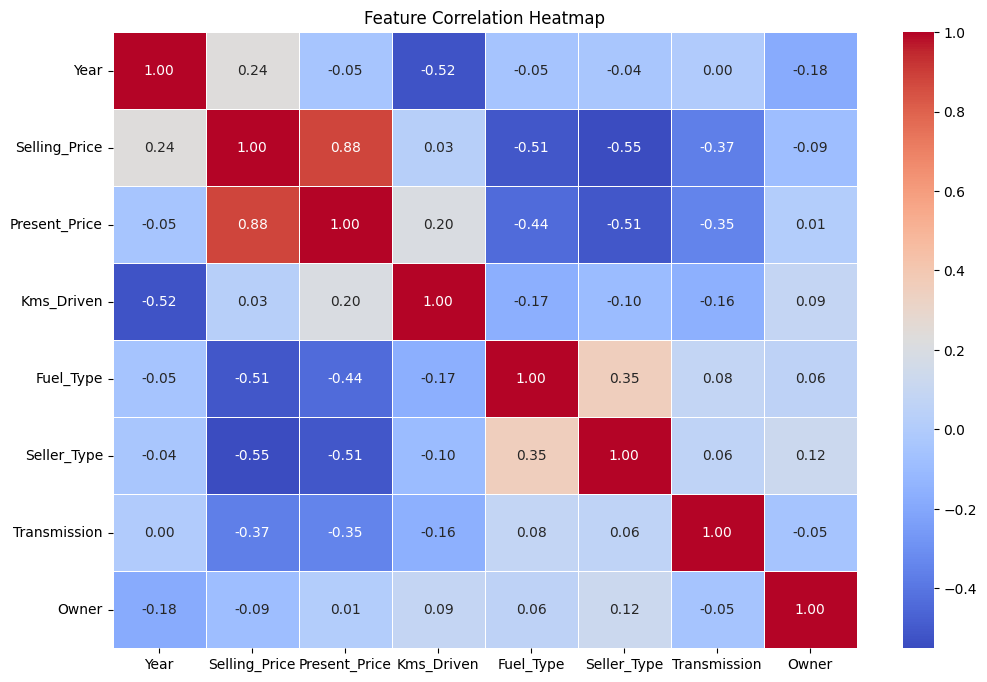

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

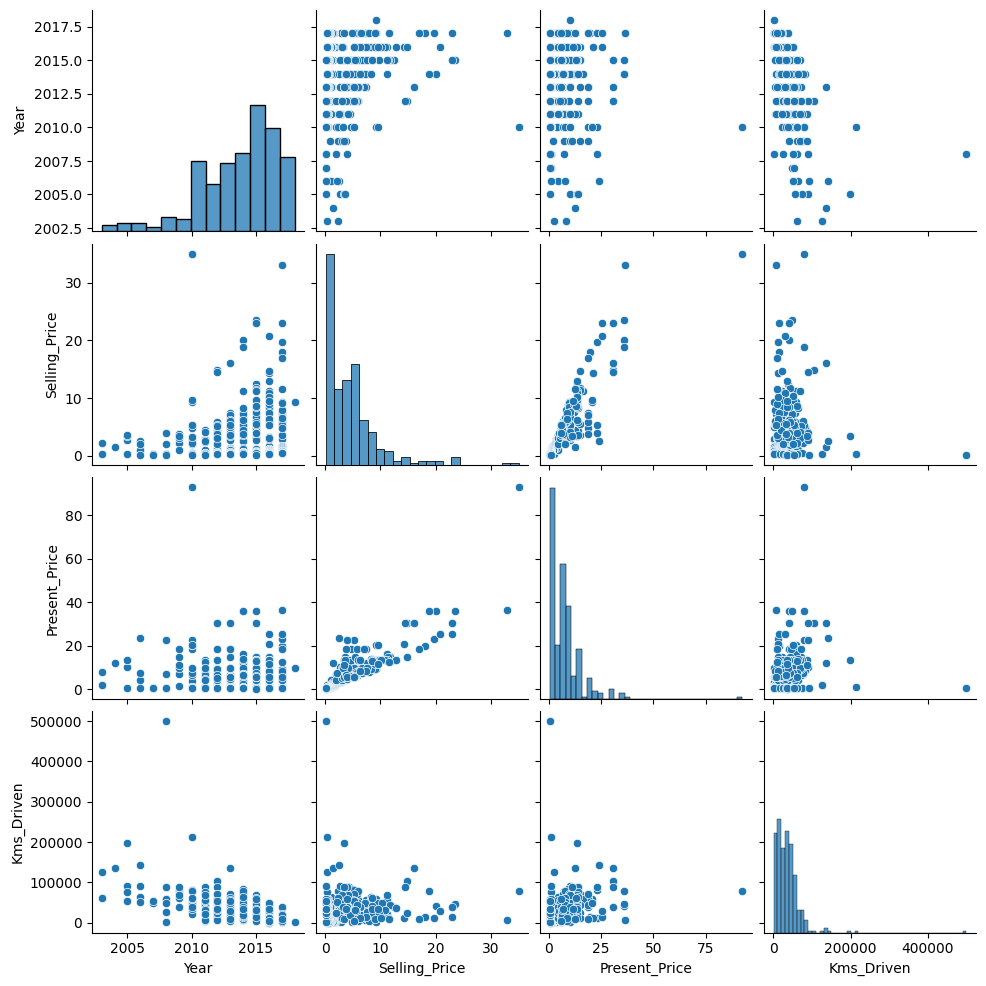

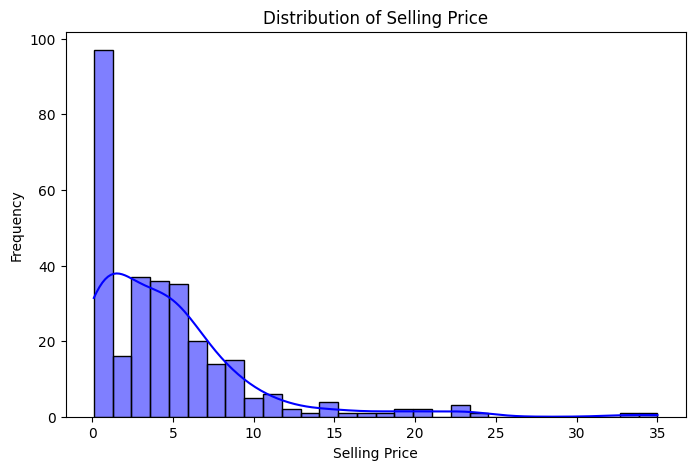

In [ ]:
sns.pairplot(df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']])
plt.show()
plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], bins=30, kde=True, color='blue')
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Linear Regression:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}\n")


Linear Regression:
R² Score: 0.8468
RMSE: 1.8785



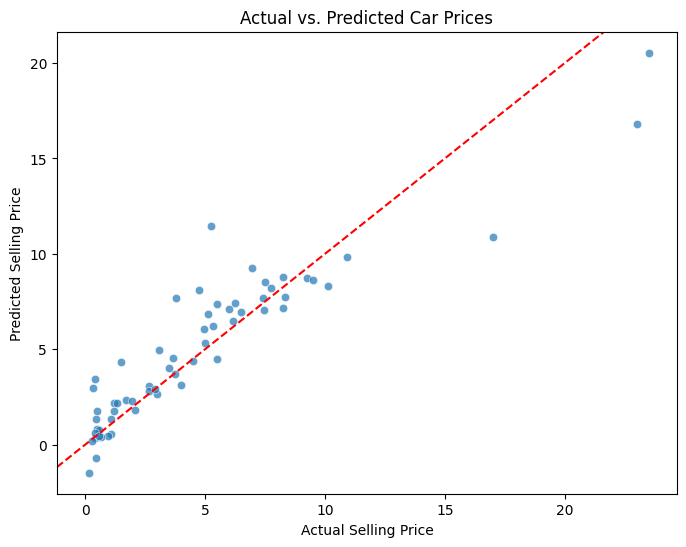

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)

plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Car Prices")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")

plt.show()


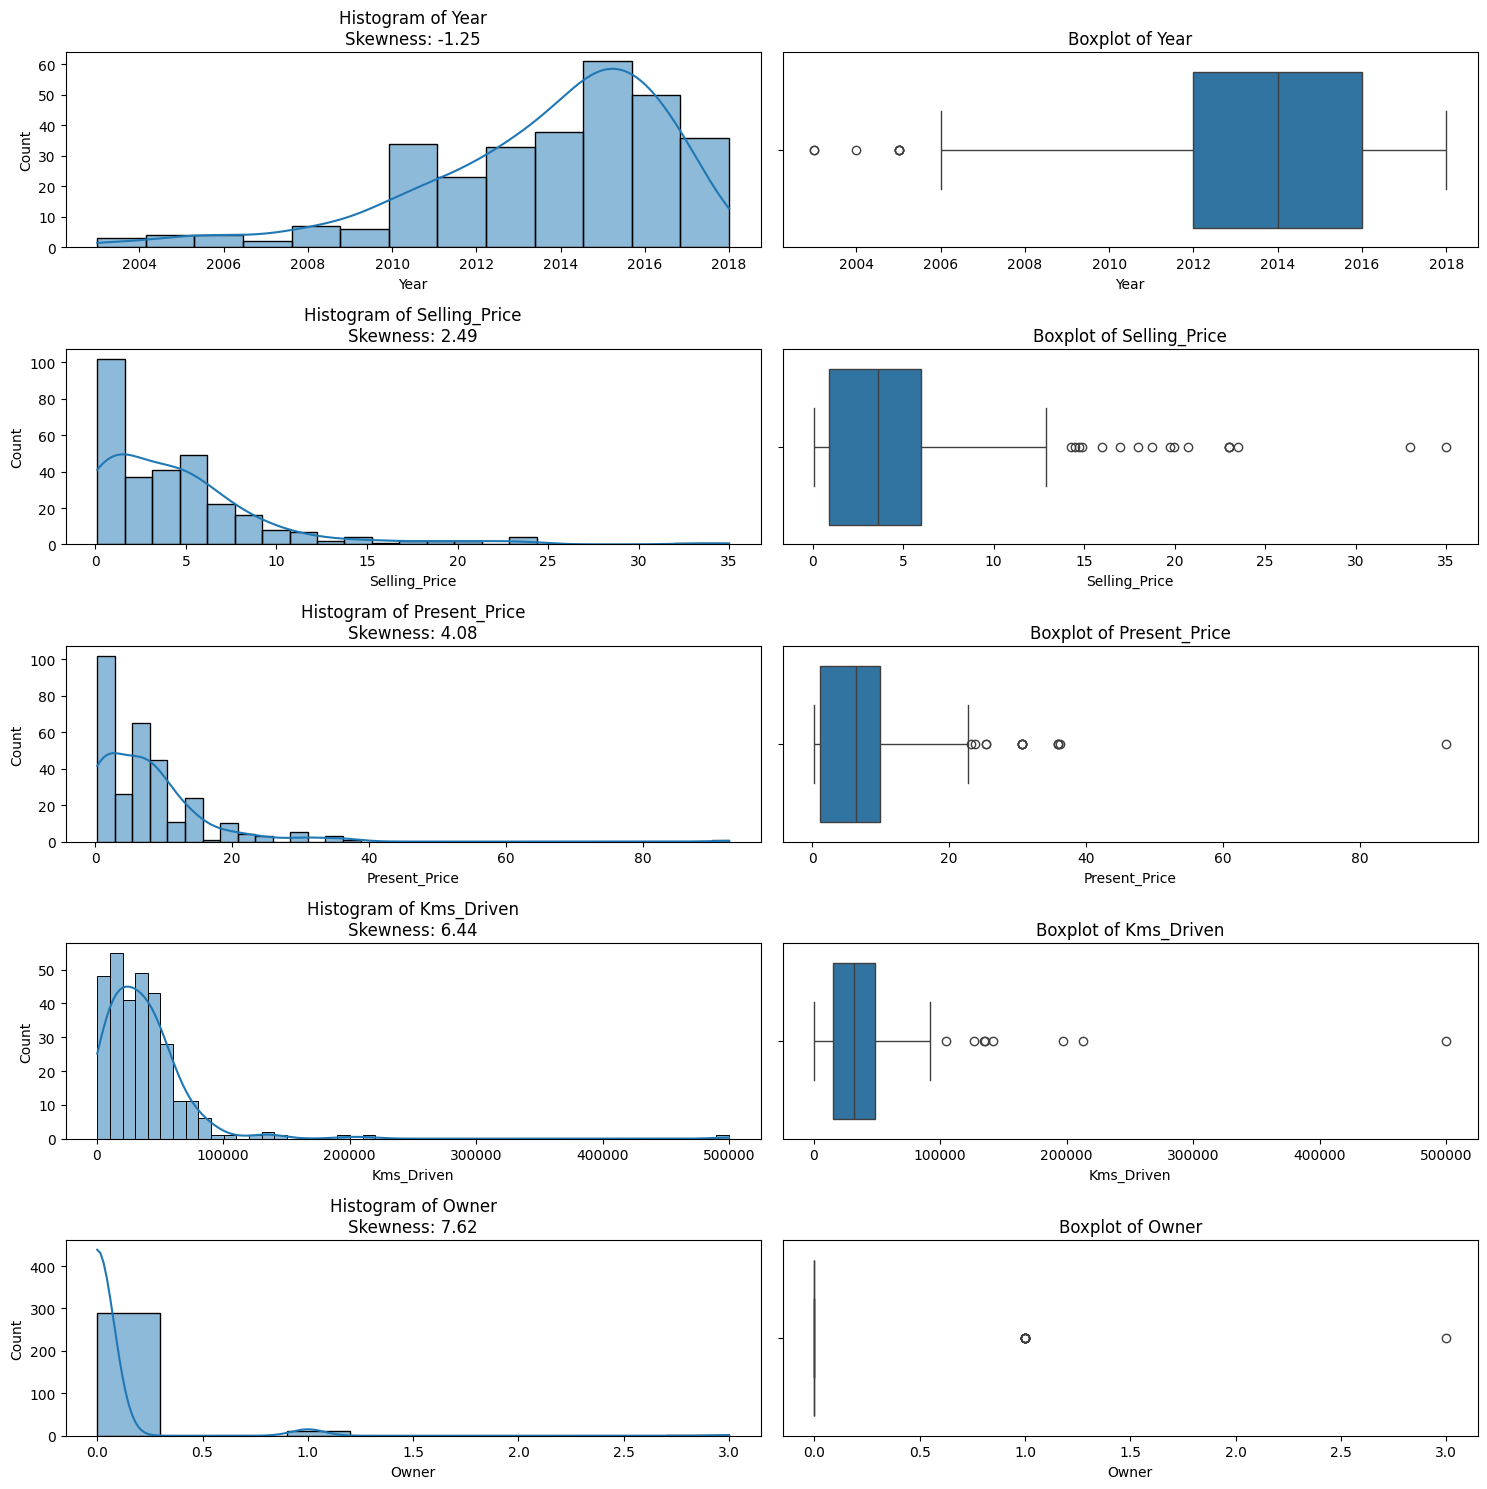

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

file_path = "/content/car data.csv"
df = pd.read_csv(file_path)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
skewness = df[numeric_cols].skew()

num_cols = len(numeric_cols)
plt.figure(figsize=(15, num_cols * 3))

for i, col in enumerate(numeric_cols):
    plt.subplot(num_cols, 2, 2 * i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}\nSkewness: {skewness[col]:.2f}')

    plt.subplot(num_cols, 2, 2 * i + 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

input_data = {
    "Year": int(input("Enter Year of Car: ")),
    "Present_Price": float(input("Enter Present Price of Car: ")),
    "Kms_Driven": int(input("Enter Kms Driven: ")),
    "Fuel_Type": input("Enter Fuel Type (Diesel or Petrol): "),
    "Seller_Type": input("Enter Seller Type (Individual or Dealer): "),
    "Transmission": input("Enter Transmission Type (Manual or Automatic): "),
}

input_df = pd.DataFrame([input_data])

input_df = pd.get_dummies(input_df, drop_first=True)

input_df = input_df.reindex(columns=X.columns, fill_value=0)

scaler = StandardScaler()
numerical_cols = ['Year', 'Present_Price', 'Kms_Driven']
input_df[numerical_cols] = scaler.fit_transform(input_df[numerical_cols])

predicted_price = model.predict(input_df)[0]

print(f"Predicted Selling Price of the Car: ₹{predicted_price:.2f}")

Enter Year of Car: 2019
Enter Present Price of Car: 700000
Enter Kms Driven: 5
Enter Fuel Type (Diesel or Petrol): 1
Enter Seller Type (Individual or Dealer): 0
Enter Transmission Type (Manual or Automatic): 1
Predicted Selling Price of the Car: ₹4.64


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

print(f"Random Forest R² Score: {r2:.4f}")
print(f"Random Forest RMSE: {rmse:.4f}")

Random Forest R² Score: 0.9609
Random Forest RMSE: 0.9488
